# Libraries and Data Load

## Load Libraries

In [164]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, StandardScaler as Scaler2, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot  #For model plotting
#import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('C:/Users/lfult/Desktop/Breach')
##############################################################################################################################

## Load Data

In [165]:
##############################################################################################################################
mydata=pd.read_csv('newbreach1.csv')
mydata.shape
##############################################################################################################################

(2423, 18)

# Recode Hospital Type

In [166]:
pd.value_counts(mydata['Hospital.Type'], normalize='columns')
m0_dict={'Short Term Acute Care Hospital':1, 'Health System':0, 'Critical Access Hospital':0, 'Childrens Hospital':0}
mydata['Hospital.Type']=mydata['Hospital.Type'].replace(dict(m0_dict))
pd.value_counts(mydata['Hospital.Type'], normalize='columns')

1    0.836566
0    0.163434
Name: Hospital.Type, dtype: float64

# Recode Ownership

In [167]:
pd.value_counts(mydata['Ownership'], normalize='columns')
m0_dict={'Voluntary Nonprofit - Other':1, 'Voluntary Nonprofit - Church':2, 'Proprietary - Corporation':3, 
         'Governmental - Hospital District':0,'Governmental - County':0,'Governmental - State':0,'Governmental - Other':0,
        'Governmental - City':0,'Proprietary - Partnership':0, 'Governmental - City-County':0,'Proprietary - Other': 0, 
         'Proprietary - Individual':0  }
mydata['Ownership']=mydata['Ownership'].replace(dict(m0_dict))
pd.value_counts(mydata['Ownership'], normalize='columns')

1    0.534049
2    0.181593
3    0.167148
0    0.117210
Name: Ownership, dtype: float64

# Drop FIPS and State (for now)

In [168]:
mydata=mydata.drop(columns=['FIPS.County.Code', 'State'])
mydata=pd.get_dummies(mydata, drop_first=True)
mydata.shape

(2423, 20)

# Data Preparation

## Handle Missing

### Columns

In [169]:
a=mydata.isnull().sum() #count the nulls by column
print(a.sort_values(ascending=False).head(10))

Breach                               0
Hospital.Type                        0
ACS...Pediatric.Trauma.Center_Yes    0
Geographic.Classification_Urban      0
Region_West                          0
Region_US Territories                0
Region_Southwest                     0
Region_Southeast                     0
Region_Northeast                     0
Average.Length.of.Stay               0
dtype: int64


### Rows


In [170]:
pd.set_option('display.max_rows', 500)
b=mydata.isnull().sum(axis=1) #count the nulls by column
b=b.sort_values(ascending=False)
print(b.head(5))

0       0
1610    0
1612    0
1613    0
1614    0
dtype: int64


## Plot Missing

<AxesSubplot:>

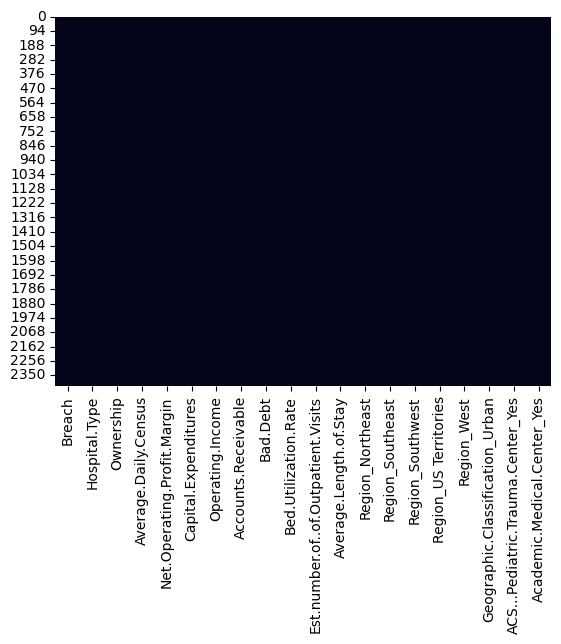

In [171]:
sns.heatmap(mydata.isnull(), cbar=False)

## Impute Median
Given the small number of missing values remaining, impute median.

missing: 0.0
(2423, 20)


<AxesSubplot:>

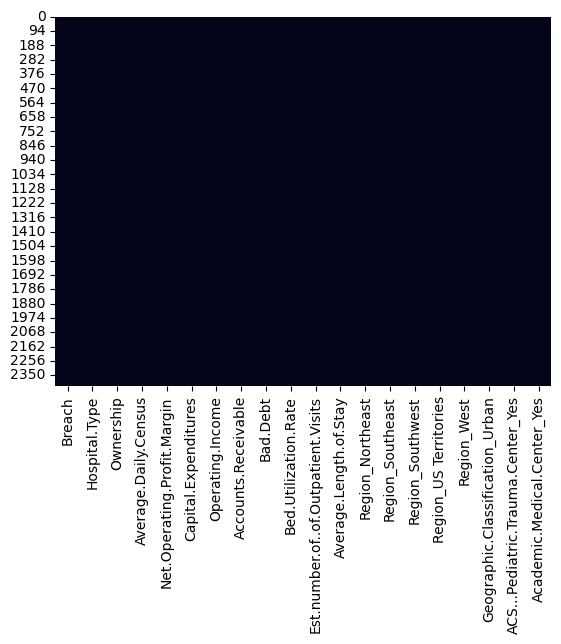

In [172]:
num=mydata.isna().sum().sum()
den=mydata.shape[0]*mydata.shape[1]
print('missing:', num/den)
mydata=mydata.fillna(mydata.median())
print(mydata.shape)
sns.heatmap(mydata.isnull(), cbar=False)

# Describe

In [173]:
pd.set_option('display.max_columns', None)
mydata.describe()

,Breach,Hospital.Type,Ownership,Average.Daily.Census,Net.Operating.Profit.Margin,Capital.Expenditures,Operating.Income,Accounts.Receivable,Bad.Debt,Bed.Utilization.Rate,Est.number.of..of.Outpatient.Visits,Average.Length.of.Stay,Region_Northeast,Region_Southeast,Region_Southwest,Region_US Territories,Region_West,Geographic.Classification_Urban,ACS...Pediatric.Trauma.Center_Yes,Academic.Medical.Center_Yes
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2423.000000,2.423000e+03,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,0.160132,0.836566,1.398679,311.056480,-0.019437,1.595638e+08,-1.975735e+07,2.884010e+08,3.852724e+07,0.568926,2.901234e+05,4.887660,0.195625,0.269913,0.115559,0.000413,0.167561,0.929426,0.025175,0.067272
std,0.366804,0.369837,0.899324,820.998357,0.381300,2.804149e+09,2.931049e+08,8.529643e+08,1.030874e+08,0.166965,5.915811e+05,1.670858,0.396763,0.444006,0.319762,0.020315,0.373553,0.256164,0.156690,0.250544
min,0.000000,0.000000,0.000000,1.200000,-3.001000,-2.130320e+08,-3.148478e+09,-3.909882e+09,6.335500e+04,0.078000,1.934000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,59.250000,-0.099000,5.047824e+06,-3.158345e+07,3.669940e+07,6.887977e+06,0.461500,5.311900e+04,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,136.050000,-0.014000,1.385977e+07,-3.144686e+06,8.630966e+07,1.490445e+07,0.584000,1.090150e+05,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,289.200000,0.076000,4.311715e+07,2.168405e+07,2.320480e+08,3.316127e+07,0.689000,2.761640e+05,5.400000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,24622.300000,15.430000,8.067732e+10,8.938337e+09,1.664642e+10,2.804779e+09,1.000000,9.558242e+06,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Training and Test Set, Oversample, Scale

In [174]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
temp=mydata
temp=temp.values
tempy=temp[:,0].astype('int')
tempx=temp[:,1:len(temp)]

train, test=tts(temp,test_size=.2, random_state=31, shuffle=True)

print(np.mean(pd.DataFrame(train)[0]))
train=pd.DataFrame(train)
test=pd.DataFrame(test)
y_train=train.iloc[:,0]
X_train=train.iloc[:,1:len(train)]
y_test=test.iloc[:,0]
X_test=test.iloc[:,1:len(test)]


##############################################################################################################################

0.15325077399380804


# Scaling on Training Set, Applied to Test Set

In [175]:
myscaler=Scaler2()
tmp=myscaler.fit(X_train)
X_train=tmp.fit_transform(X_train)
X_test=tmp.fit_transform(X_test)
print(X_train.shape, X_test.shape)
print(np.unique(y_train,return_counts=True), np.unique(y_test, return_counts=True))

(1938, 19) (485, 19)
(array([0., 1.]), array([1641,  297], dtype=int64)) (array([0., 1.]), array([394,  91], dtype=int64))


# Functions for Confusion Matrix and PR Plot

## Confusion Matrix on Unseen, Pristine Test Set Only

In [176]:
def myf(mod):
    y_hat=mod.predict(X_test).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        plot_confusion_matrix(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = plot_precision_recall_curve(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Logistic Regression Models

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.895062   0.354037  0.715464    0.624549      0.793550
recall       0.736041   0.626374  0.715464    0.681207      0.715464
f1-score     0.807799   0.452381  0.715464    0.630090      0.741113
support    394.000000  91.000000  0.715464  485.000000    485.000000


C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,LR_coef,SE,Odds_Ratio,OR_Lower_5%,OR_Upper_5%,Z,p_value
Net.Operating.Profit.Margin,-0.536163,0.144580,0.584989,0.440635,0.776634,-3.708421,0.000
Hospital.Type,-0.383876,0.061863,0.681216,0.603429,0.769031,-6.205259,0.000
Average.Daily.Census,-0.167040,0.142211,0.846166,0.640329,1.118171,-1.174589,0.120
Ownership,-0.153848,0.054191,0.857402,0.771004,0.953482,-2.839025,0.002
Operating.Income,-0.065983,0.079636,0.936147,0.800860,1.094288,-0.828558,0.204
Region_Southeast,-0.062623,0.064133,0.939298,0.828347,1.065109,-0.976453,0.164
ACS...Pediatric.Trauma.Center_Yes,-0.044696,0.051771,0.956288,0.864013,1.058418,-0.863340,0.194
Bad.Debt,-0.026946,0.114574,0.973414,0.777625,1.218498,-0.235183,0.407
Region_West,0.000946,0.059612,1.000947,0.890569,1.125004,0.015873,0.494
Capital.Expenditures,0.016172,0.081060,1.016303,0.867009,1.191305,0.199505,0.421


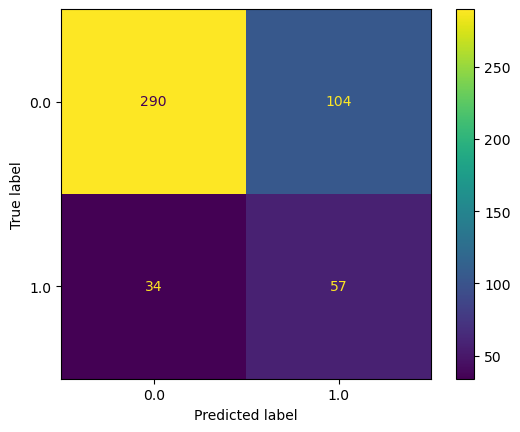

In [177]:
##############################################################################################################################
mylr=LR(fit_intercept = True, class_weight='balanced') #logistic model
mylr.fit(X_train, y_train)  #Fit on training data 
print(myf(mylr)) #predict on test set and plot
feature_names = mydata.columns[1:len(mydata)]
lrdf=pd.DataFrame(np.squeeze(mylr.coef_), columns=['LR_coef'])
lrdf.index=np.squeeze(feature_names)
predProbs = mylr.predict_proba(X_train)
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
V = np.diagflat(np.product(predProbs, axis=1))
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
lrdf['SE']=np.sqrt(np.diag(covLogit))[1:106]

lrdf['Odds_Ratio']=np.exp(lrdf['LR_coef'])
lrdf['OR_Lower_5%']=np.exp(lrdf['LR_coef']-1.96*lrdf['SE'])
lrdf['OR_Upper_5%']=np.exp(lrdf['LR_coef']+1.96*lrdf['SE'])
lrdf['Z']=lrdf['LR_coef']/lrdf['SE']
from scipy.stats import norm
lrdf['p_value']=np.round(1-norm.cdf(abs(lrdf['Z'])),3)
lrdf.sort_values(by=['Odds_Ratio'], ascending=True)

##############################################################################################################################

C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


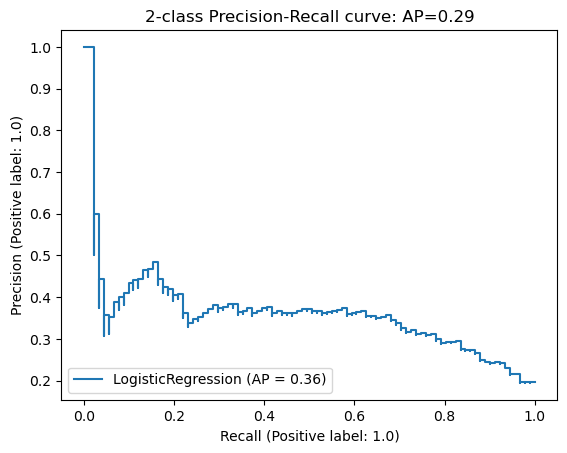

In [178]:
prplot(mylr)

<AxesSubplot:>

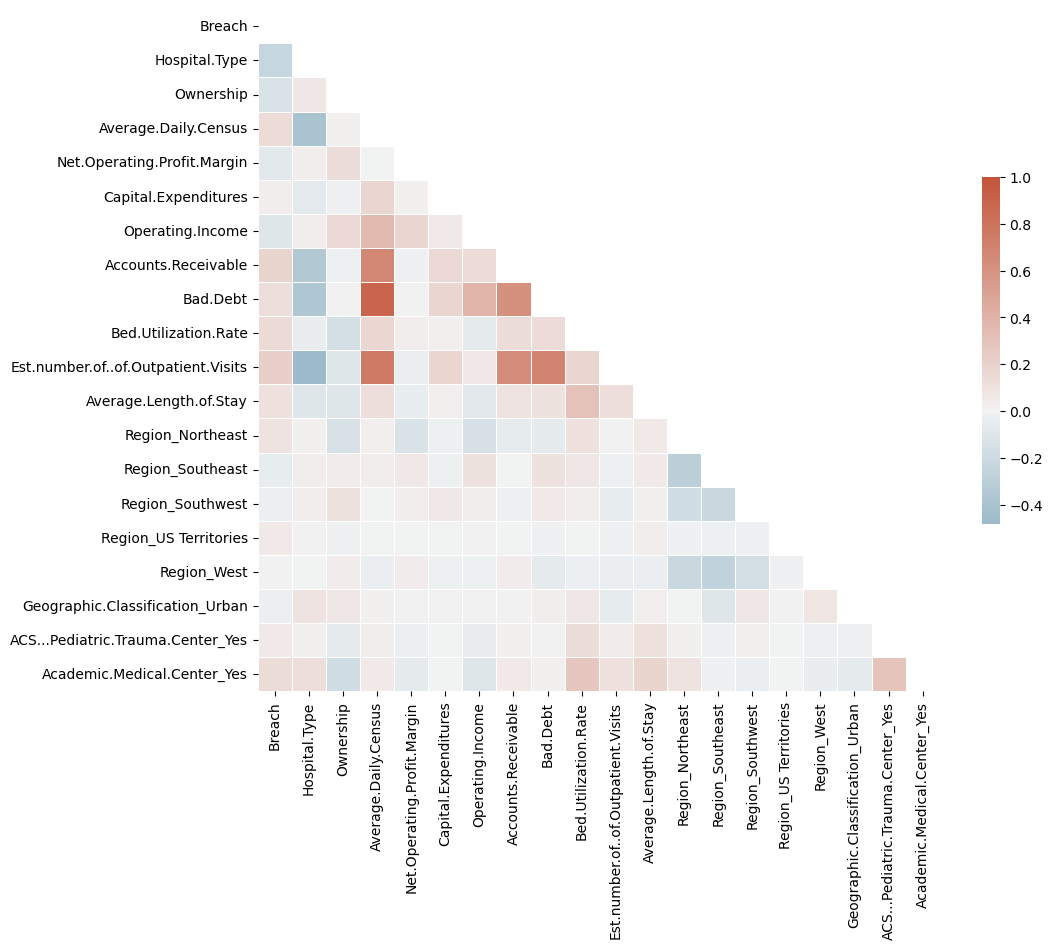

In [179]:
corr = mydata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# VIF

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame(X_train)
X.columns=mydata.columns[1:len(mydata)]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Hospital.Type,1.409245
1,Ownership,1.116844
2,Average.Daily.Census,6.144893
3,Net.Operating.Profit.Margin,1.058490
4,Capital.Expenditures,1.099305
5,Operating.Income,1.200626
6,Accounts.Receivable,1.942352
7,Bad.Debt,4.248498
8,Bed.Utilization.Rate,1.248697
9,Est.number.of..of.Outpatient.Visits,3.255016


# Linear SVM Classifier

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.878173   0.232639  0.494845    0.555406      0.757052
recall       0.439086   0.736264  0.494845    0.587675      0.494845
f1-score     0.585448   0.353562  0.494845    0.469505      0.541940
support    394.000000  91.000000  0.494845  485.000000    485.000000


C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,SGD_coef,SGD_abscoef
Region_US Territories,19.785544,19.785544
Capital.Expenditures,13.262546,13.262546
Region_Southwest,1.885444,1.885444
Accounts.Receivable,1.629158,1.629158
Academic.Medical.Center_Yes,1.541544,1.541544
Region_West,1.264420,1.264420
Average.Daily.Census,-1.255578,1.255578
Ownership,1.124707,1.124707
Bed.Utilization.Rate,0.884045,0.884045
Bad.Debt,-0.777721,0.777721


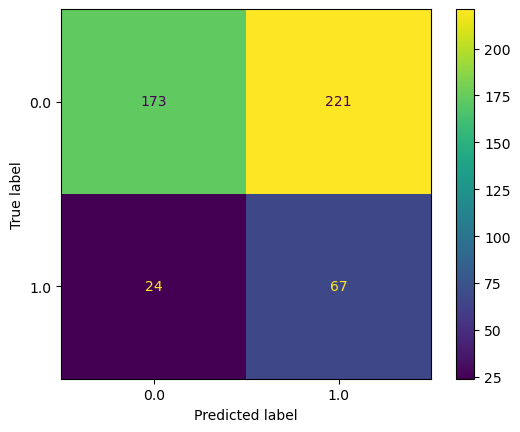

In [181]:
mysgd=SGD(loss='hinge', fit_intercept=True, random_state=43, class_weight='balanced')
mysgd.fit(X_train,y_train)
print(myf(mysgd))
sgddf=pd.DataFrame(np.squeeze(mysgd.coef_), columns=['SGD_coef'])
sgddf.index=np.squeeze(feature_names)
sgddf['SGD_abscoef']=abs(sgddf['SGD_coef'])
sgddf.sort_values(by=['SGD_abscoef'], ascending=False)

C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


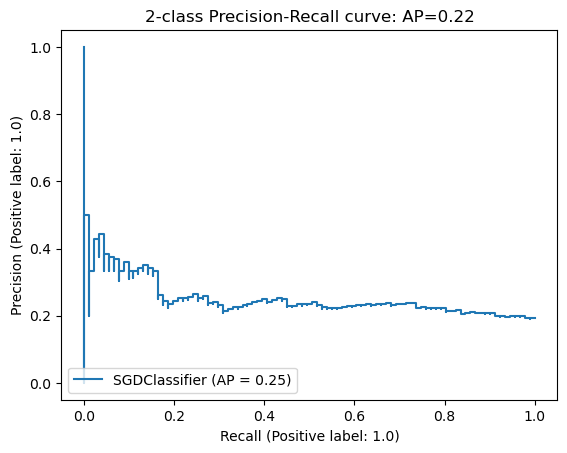

In [182]:
prplot(mysgd)

# Neural Network

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.889286   0.292683  0.637113    0.590984      0.777346
recall       0.631980   0.659341  0.637113    0.645660      0.637113
f1-score     0.738872   0.405405  0.637113    0.572139      0.676304
support    394.000000  91.000000  0.637113  485.000000    485.000000


C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,NN_coef,NN_abscoef
Region_US Territories,143.474449,143.474449
Capital.Expenditures,73.810774,73.810774
Geographic.Classification_Urban,-16.817459,16.817459
Accounts.Receivable,16.502865,16.502865
Est.number.of..of.Outpatient.Visits,13.359095,13.359095
Net.Operating.Profit.Margin,-11.749433,11.749433
Hospital.Type,-11.356262,11.356262
ACS...Pediatric.Trauma.Center_Yes,8.881806,8.881806
Average.Daily.Census,-8.539051,8.539051
Academic.Medical.Center_Yes,8.340029,8.340029


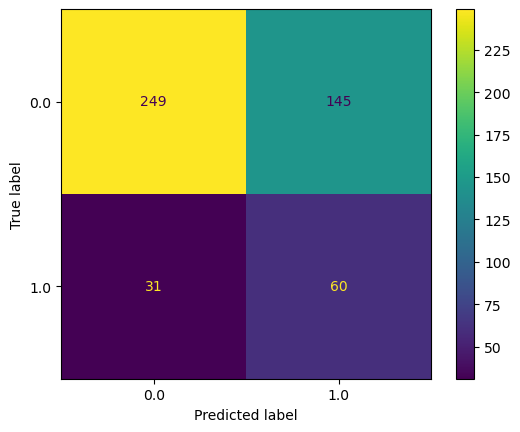

In [184]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
#nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,3,6), random_state=1)
nn=Perceptron(random_state=2, class_weight='balanced')
nn.fit(X_train, y_train)
print(myf(nn))
nndf=pd.DataFrame(np.squeeze(nn.coef_), columns=['NN_coef'])
nndf.index=np.squeeze(feature_names)
nndf['NN_abscoef']=abs(nndf['NN_coef'])
nndf.sort_values(by=['NN_abscoef'], ascending=False)

# Naive Bayes

                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.889286   0.292683  0.637113    0.590984      0.777346
recall       0.631980   0.659341  0.637113    0.645660      0.637113
f1-score     0.738872   0.405405  0.637113    0.572139      0.676304
support    394.000000  91.000000  0.637113  485.000000    485.000000


C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lfult\.conda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,NB_coef,NB_abscoef
Region_US Territories,-5.007296,5.007296
ACS...Pediatric.Trauma.Center_Yes,-3.302548,3.302548
Region_Southwest,-2.203936,2.203936
Academic.Medical.Center_Yes,-1.829243,1.829243
Region_West,-1.768618,1.768618
Capital.Expenditures,-1.541560,1.541560
Region_Southeast,-1.541560,1.541560
Ownership,-1.451948,1.451948
Region_Northeast,-1.343735,1.343735
Net.Operating.Profit.Margin,-0.921320,0.921320


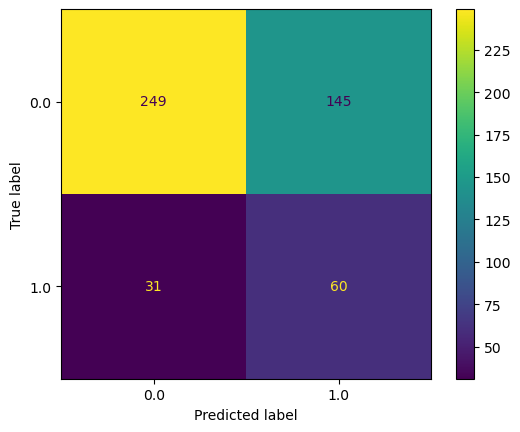

In [188]:
from sklearn.naive_bayes import BernoulliNB as NB
nb = NB(class_prior=[1,5.244845])
nb.fit(X_train, y_train)
print(myf(nn))
nbdf=pd.DataFrame(np.squeeze(nb.coef_), columns=['NB_coef'])
nbdf.index=np.squeeze(feature_names)
nbdf['NB_abscoef']=abs(nbdf['NB_coef'])
nbdf.sort_values(by=['NB_abscoef'], ascending=False)
